In [1]:
#matplotlib inline
import matplotlib.pylab as plt
import numpy as np

import torch
import torch.autograd
from torch.autograd import Variable

In [9]:
y = [32,29,49,13,51,28,35]

In [17]:
eta = 0.005

In [21]:
w = Variable(200*torch.randn(1).double(), requires_grad=True)

for epoch in range(100):
    for i in range(len(y)):
        f = w
        E = (y[i] - f)**2
        
        E.backward()
        
        w.data.add_(-eta * w.grad.data)
    
        w.grad.zero_()

ws = w.data
print(ws)
        

tensor([33.9337], dtype=torch.float64)


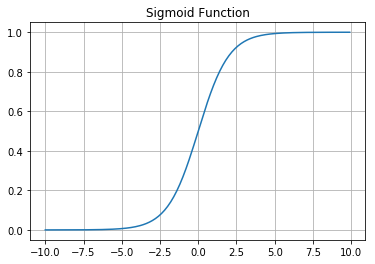

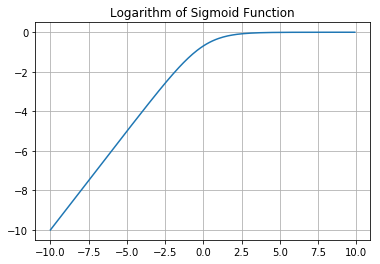

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10.0, 10.0, 0.1)

plt.plot(x, sigmoid(x))
plt.grid(True)
plt.title("Sigmoid Function")
plt.show()

plt.plot(x, np.log(sigmoid(x)))
plt.grid(True)
plt.title("Logarithm of Sigmoid Function")
plt.show()


In [64]:
#matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

import torch
import torch.autograd
from torch.autograd import Variable

def logsumexp(b):
    return torch.log(1 + torch.exp(b))

def f(x):
    return torch.log(1 / (1 + torch.exp(-x)))

df_iris = pd.read_csv(u'data/iris.txt',sep=' ')

y = torch.from_numpy(np.array(df_iris['c'])).double()
y[y>1]=0

x = torch.from_numpy(np.array(df_iris[['sl','sw','pl','pw']])).double()

w = Variable(20*torch.randn(4).double(), requires_grad=True)

eta = 0.00005

for epoch in range(1000):
    for i in range(len(y)):
        f = torch.matmul(x[i,:],w)
        
        E = -y[i]*f + logsumexp(f)
        
        E.backward()

    w.data.add_(-eta * w.grad.data)
    
    w.grad.zero_()
    
ws = w.data
print(ws)

tensor([-20.0149,   5.7491,  21.1396,  -0.9967], dtype=torch.float64)


In [66]:
#matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

import torch
import torch.autograd
from torch.autograd import Variable

def logsumexp(b):
    return torch.log(1 + torch.exp(b))

def f(x):
    return torch.log(1 / (1 + torch.exp(-x)))

df_iris = pd.read_csv(u'data/iris.txt',sep=' ')

y = torch.from_numpy(np.array(df_iris['c'])).double()
y[y>1]=0

x = torch.from_numpy(np.array(df_iris[['sl','sw','pl','pw']])).double()

w = Variable(20*torch.randn(4).double(), requires_grad=True)

eta = 0.00005

for epoch in range(1000):
    for i in range(len(y)):
        f = torch.matmul(x[i,:],w)
        
        E = -y[i]*f + logsumexp(f)
        
        E.backward()

        w.data.add_(-eta * w.grad.data)
    
        w.grad.zero_()
    
ws = w.data
print(ws)

tensor([ 15.6429,  -7.4401, -14.9630, -14.4475], dtype=torch.float64)
